In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
%matplotlib inline

pd.set_option("max_rows",100)

In [4]:
# Filepath to read Bike lanes shapefile
filepath_bike_lanes = "NYC Bike Lanes Routes Shapefiles/geo_export_080d6eb7-8dd8-49a3-89f8-c1fe1f89af1c.shp"
filepath_nyc_boundaries = "Borough Boundaries/geo_export_df017658-06e6-4fbf-8be1-4070c446823f.shp"

In [5]:
Bike_lanes_gdf = gpd.read_file(filepath_bike_lanes)
NYC_gdf = gpd.read_file(filepath_nyc_boundaries)

In [6]:
# Check Coordinate reference system
Bike_lanes_gdf.crs == NYC_gdf.crs

True

In [12]:
Bike_lanes_gdf.head()

,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft2facilit,ft_facilit,lanecount,onoffst,segmentid,shape_leng,street,tf2facilit,tf_facilit,tostreet,geometry
0,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,53.0,131.771990,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24993 40.50088, -74.24969 40.5..."
1,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,57.0,268.689582,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24916 40.49872, -74.24935 40.4..."
2,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,59.0,420.193253,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.24935 40.49944, -74.24969 40.5..."
3,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,61.0,238.242198,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.25185 40.50281, -74.25177 40.5..."
4,I,2,5.0,None,I,HYLAN BLVD,None,Greenway,2.0,OFF,64.0,646.293832,CONFERENCE HOUSE PARK GREENWAY,None,Greenway,SWINNERTON ST,"LINESTRING (-74.25133 40.50229, -74.24993 40.5..."


In [7]:
Bike_lanes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19875 entries, 0 to 19874
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   allclasses  19875 non-null  object  
 1   bikedir     19875 non-null  object  
 2   boro        19875 non-null  float64 
 3   comments    1638 non-null   object  
 4   facilitycl  19875 non-null  object  
 5   fromstreet  19875 non-null  object  
 6   ft2facilit  11 non-null     object  
 7   ft_facilit  14732 non-null  object  
 8   lanecount   19875 non-null  float64 
 9   onoffst     19875 non-null  object  
 10  segmentid   19875 non-null  float64 
 11  shape_leng  19875 non-null  float64 
 12  street      19875 non-null  object  
 13  tf2facilit  37 non-null     object  
 14  tf_facilit  14557 non-null  object  
 15  tostreet    19875 non-null  object  
 16  geometry    19875 non-null  geometry
dtypes: float64(4), geometry(1), object(12)
memory usage: 2.6+ MB


In [11]:
Bike_lanes_gdf.ft_facilit.unique()

array(['Greenway', 'Standard', 'Curbside', 'Sharrows', 'Sidewalk',
       'Protected Path', 'Signed Route', None, 'Bike-Friendly Parking',
       'Buffered Conventional', 'Boardwalk', 'Buffered', 'Ped Plaza',
       'Dirt Trail', 'Link', '<Null>', 'Dirt Path'], dtype=object)

In [9]:
Bike_lanes_gdf.ft2facilit.unique()

array([None, 'Protected Path', 'Curbside'], dtype=object)

In [14]:
#Reduced Column List
Bike_lanes_Reduced_Column_List = ['boro','segmentid','shape_leng','geometry']

In [16]:
Bike_lanes_gdf = Bike_lanes_gdf[Bike_lanes_Reduced_Column_List]

In [17]:
Bike_lanes_gdf.head()

,boro,segmentid,shape_leng,geometry
0,5.0,53.0,131.771990,"LINESTRING (-74.24993 40.50088, -74.24969 40.5..."
1,5.0,57.0,268.689582,"LINESTRING (-74.24916 40.49872, -74.24935 40.4..."
2,5.0,59.0,420.193253,"LINESTRING (-74.24935 40.49944, -74.24969 40.5..."
3,5.0,61.0,238.242198,"LINESTRING (-74.25185 40.50281, -74.25177 40.5..."
4,5.0,64.0,646.293832,"LINESTRING (-74.25133 40.50229, -74.24993 40.5..."


/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:370: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:637: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


Text(0.5, 1.0, 'Bike Lanes in NYC')

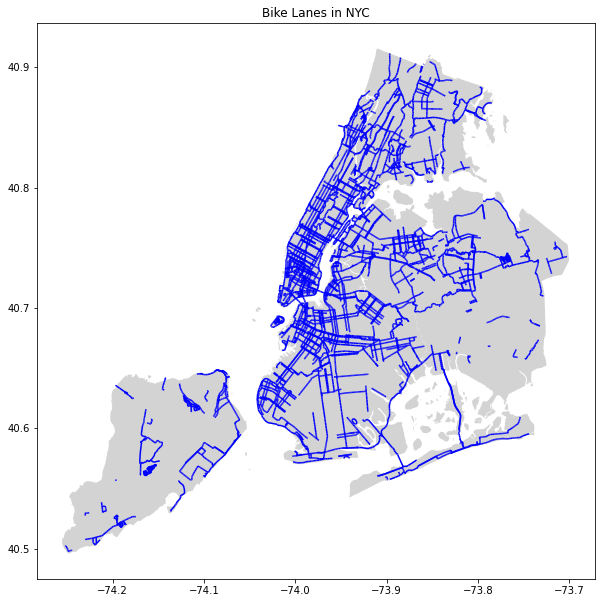

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
NYC_gdf['geometry'].plot(axes=ax, color = 'lightgray')
Bike_lanes_gdf.plot(axes=ax , color='Blue', markersize=5)
plt.title('Bike Lanes in NYC')